In [2]:
import pandas as pd


In [3]:
demographics = pd.read_csv("EWR_Ortsteile_2016-06-30_2.csv",delimiter=';')
demographics.head()

,Bezirk,Bez-Name,Ortsteil,Ortst-Name,Geschl,Staatsangeh,Altersgr,Population
0,1,Mitte,101,Mitte,1,A,00_05,375
1,1,Mitte,101,Mitte,1,A,05_10,335
2,1,Mitte,101,Mitte,1,A,10_15,249
3,1,Mitte,101,Mitte,1,A,15_20,291
4,1,Mitte,101,Mitte,1,A,20_25,933


In [4]:
demographics.Bezirk.drop_duplicates().shape

(12,)

In [5]:
demographics['Bezirk'] = demographics['Bezirk'].map(lambda x: str(x).zfill(2))
demographics['Ortsteil'] = demographics.Ortsteil.map(lambda x: str(x).zfill(4))
demographics.head()

,Bezirk,Bez-Name,Ortsteil,Ortst-Name,Geschl,Staatsangeh,Altersgr,Population
0,01,Mitte,0101,Mitte,1,A,00_05,375
1,01,Mitte,0101,Mitte,1,A,05_10,335
2,01,Mitte,0101,Mitte,1,A,10_15,249
3,01,Mitte,0101,Mitte,1,A,15_20,291
4,01,Mitte,0101,Mitte,1,A,20_25,933


In [6]:
import shapefile as shp

In [7]:
sf = shp.Reader('RBS_OD_STI_EU1405.shp')

In [17]:
shape_berlin_2 = pd.DataFrame(sf_simple.records()) 
shape_berlin_2.columns = [item[0] for item in sf_simple.fields[1:]]

shape_berlin_2.head()

,Bez,BezName
0,01,Mitte
1,02,Friedrichshain-Kreuzberg
2,03,Pankow
3,04,Charlottenburg-Wilmersdorf
4,05,Spandau


In [23]:
import matplotlib.pyplot as plt

%matplotlib inline


In [47]:
demographics

,Bezirk,Bez-Name,Ortsteil,Ortst-Name,Geschl,Staatsangeh,Altersgr,Population
0,01,Mitte,0101,Mitte,1,A,00_05,375
1,01,Mitte,0101,Mitte,1,A,05_10,335
2,01,Mitte,0101,Mitte,1,A,10_15,249
3,01,Mitte,0101,Mitte,1,A,15_20,291
4,01,Mitte,0101,Mitte,1,A,20_25,933
5,01,Mitte,0101,Mitte,1,A,25_30,2116
6,01,Mitte,0101,Mitte,1,A,30_35,2336
7,01,Mitte,0101,Mitte,1,A,35_40,1777
8,01,Mitte,0101,Mitte,1,A,40_45,1302
9,01,Mitte,0101,Mitte,1,A,45_50,964


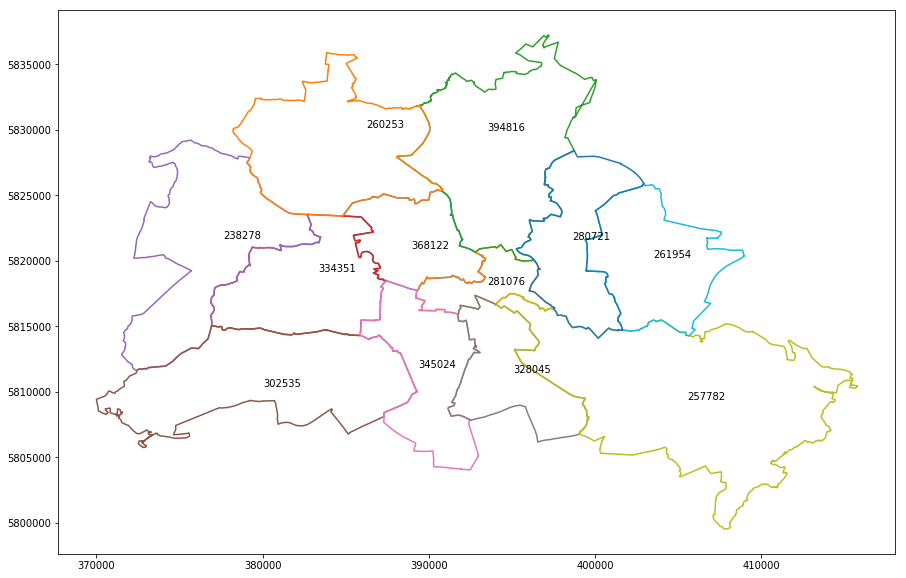

In [56]:
listx=[]
listy=[]

sf_simple = shp.Reader('RBS_OD_BEZ_1412.shp')
plt.figure(figsize = (15,10))
for sr in sf_simple.shapeRecords():
    val_pop =demographics[demographics.Bezirk == sr.record[0]].sum()['Population']
    val_name = demographics[demographics.Bezirk == sr.record[0]].sum()['Bez-Name']
    x= [i[0] for i in sr.shape.points[:]]
    y= [i[1] for i in sr.shape.points[:]]
    plt.plot(x,y)
    
    sr.shape.points.
    
    mean_x= float(sum(x))/float(len(x))
    mean_y = float(sum(y))/float(len(y))
    plt.text(mean_x, mean_y, "{0}".format(val_pop))
        
# plt.plot(listx,listy)
plt.show()

In [8]:
shape_berlin = pd.DataFrame(sf.records()) 
shape_berlin.columns = [item[0] for item in sf.fields[1:]]

shape_berlin.head()

,STI,BEZ,WKR,BRFW
0,01205,01,0102,012C
1,01206,01,0102,012C
2,01209,01,0102,012A
3,01210,01,0102,012A
4,01211,01,0102,012A


In [9]:
[item[0] for item in sf.fields[1:]]

['STI', 'BEZ', 'WKR', 'BRFW']

In [10]:
data = demographics.merge(shape_berlin, left_on = ['Bezirk','Ortsteil'], right_on = ['BEZ','WKR'])
data = data.drop(["STI","BRFW"],axis=1)
data = data.drop_duplicates()
data

,Bezirk,Bez-Name,Ortsteil,Ortst-Name,Geschl,Staatsangeh,Altersgr,Population,BEZ,WKR
0,01,Mitte,0101,Mitte,1,A,00_05,375,01,0101
32,01,Mitte,0101,Mitte,1,A,05_10,335,01,0101
64,01,Mitte,0101,Mitte,1,A,10_15,249,01,0101
96,01,Mitte,0101,Mitte,1,A,15_20,291,01,0101
128,01,Mitte,0101,Mitte,1,A,20_25,933,01,0101
160,01,Mitte,0101,Mitte,1,A,25_30,2116,01,0101
192,01,Mitte,0101,Mitte,1,A,30_35,2336,01,0101
224,01,Mitte,0101,Mitte,1,A,35_40,1777,01,0101
256,01,Mitte,0101,Mitte,1,A,40_45,1302,01,0101
288,01,Mitte,0101,Mitte,1,A,45_50,964,01,0101


In [11]:
import geopandas

ImportError: dlopen(/Users/mirunapopa/anaconda2/lib/python2.7/site-packages/fiona/ogrext.so, 2): Library not loaded: @loader_path/./libgssapi_krb5.2.2.dylib
  Referenced from: /Users/mirunapopa/anaconda2/lib/libgdal.20.dylib
  Reason: image not found

In [12]:
import fiona

ImportError: dlopen(/Users/mirunapopa/anaconda2/lib/python2.7/site-packages/fiona/ogrext.so, 2): Library not loaded: @loader_path/./libgssapi_krb5.2.2.dylib
  Referenced from: /Users/mirunapopa/anaconda2/lib/libgdal.20.dylib
  Reason: image not found

In [37]:
demographics.groupby(["Bezirk","Bez-Name","Ortst-Name"]).sum()["Population"]

Bezirk  Bez-Name                    Ortst-Name               
01      Mitte                       Gesundbrunnen                 92543
                                    Hansaviertel                   5710
                                    Mitte                         93144
                                    Moabit                        77344
                                    Tiergarten                    14491
                                    Wedding                       84890
02      Friedrichshain-Kreuzberg    Friedrichshain               127189
                                    Kreuzberg                    153887
03      Pankow                      Blankenburg                    6814
                                    Blankenfelde                   2110
                                    Buch                          15704
                                    Französisch Buchholz          20701
                                    Heinersdorf                    6797
  